In [52]:
import os
import kagglehub
import random
import cv2 as cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

path = kagglehub.dataset_download("deeptrial/miniimagenet")

print("Path to dataset files:", path)

path=path+"/ImageNet-Mini/images"

folder_list=os.listdir(path)

images_list=[]
for folder in folder_list:
  folder_path=path+"/"+folder
  New_list=os.listdir(folder_path)
  for image in New_list:
    image_path=folder_path+"/"+image
    images_list.append(image_path)



#print(len(folder_list))
#print(len(images_list))

Using Colab cache for faster access to the 'miniimagenet' dataset.
Path to dataset files: /kaggle/input/miniimagenet


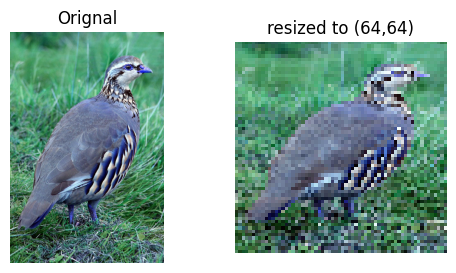

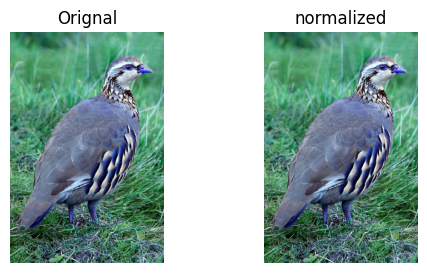

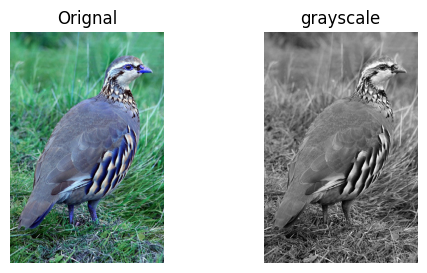

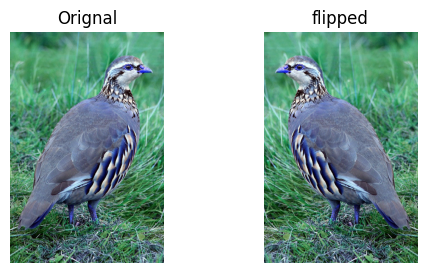

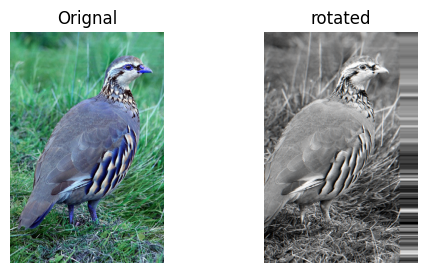

In [55]:
img=cv2.imread(random.choice(images_list))


def resize_image(img, new_size=(64, 64)):
    img_tf = tf.image.resize(img, new_size)
    return img_tf.numpy().astype(np.uint8)



def normalize_image(img):
    img_norm = img.astype("float32") / 255.0
    return img_norm



def grayscale_image(img):
    gray = tf.image.rgb_to_grayscale(img)
    return gray.numpy()



def flip_image(img):
    flipped = tf.image.flip_left_right(img)
    return flipped.numpy()



def rotate_image(img, angle_deg=20):
    angle_rad = angle_deg * np.pi/ 180
    rotated = tf.keras.preprocessing.image.random_rotation(img, 20)

    return rotated




def show(before, after, title_after="After"):
    plt.figure(figsize=(6, 3))

    plt.subplot(1, 2, 1)
    plt.imshow(before)
    plt.title("Orignal")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(after if after.ndim == 3 else after[..., 0], cmap="gray")
    plt.title(title_after)
    plt.axis("off")

    plt.show()

resize_img=resize_image(img)
show(img, resize_img,"resized to (64,64)")

normaliz_img=normalize_image(img)
show(img, normaliz_img,"normalized")

gray_img=grayscale_image(img)
show(img, gray_img,"grayscale")

flip_img=flip_image(img)
show(img, flip_img,"flipped")

rotate_img=rotate_image(img,260)
show(img, rotate_img,"rotated")


